In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
from astropy.io import fits

UVJinfo = pd.read_csv('UBVJ_MASTER_SpARCS_0035.csv')
KJzRinfo = pd.read_csv('SpARCS_0035_totalall_HAWKIKs_photom.csv')
SPECZ_Match = pd.read_csv('SpARCS_0035_SPECZ_MATCHED.csv')
clusterinfo = pd.read_csv('clusterzinfo.csv')

ID = KJzRinfo.id
k_flux = KJzRinfo.HAWKIKs_tot
R_flux = KJzRinfo.VIMOSR
z_flux = KJzRinfo.DECamz
J_flux = KJzRinfo.HAWKIJ
k_star = KJzRinfo.K_star
mask = KJzRinfo.totmask
IDUVJ = UVJinfo.PHOTID
CLUSTERZ = UVJinfo.CLUSTERZ
indivz = UVJinfo.INDIVZ
U_V = UVJinfo.U_V
V_J = UVJinfo.V_J
source = SPECZ_Match.source
quality = SPECZ_Match.quality
specZ = SPECZ_Match.spec_z
redshift = clusterinfo.Redshift

#The Cluster Redshift from Balough et al.
clustZ = redshift[12]
#source(1=GOGREEN,2=GCLASS,3=SPT,4=FORS2,5=NED)
zmemberselector=0.0066712819*(1+clustZ)

J_K = 2.5*np.log10(k_flux/J_flux)
z_K = 2.5*np.log10(k_flux/z_flux)
R_K = 2.5*np.log10(k_flux/R_flux)
K = -2.5*np.log10(k_flux) + 25

a = 0
JMINK = np.zeros((len(k_star),1), dtype=float)
zMINK = np.zeros((len(k_star),1), dtype=float)
RMINK = np.zeros((len(k_star),1), dtype=float)
UMINV = np.zeros((len(k_star),1), dtype=float)
VMINJ = np.zeros((len(k_star),1), dtype=float)
KMAG = np.zeros((len(k_star),1), dtype=float)
for i in range(len(k_star)):
    JMINK[a]=J_K[i]
    zMINK[a]=z_K[i]
    RMINK[a]=R_K[i]
    UMINV[a]=U_V[i]
    VMINJ[a]=V_J[i]
    KMAG[a]=K[i]
    a=a+1

goodJK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(J_K) == True))
goodzK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(z_K) == True))
goodRK = np.where((k_star < 0.97) & (mask ==0) & (~np.isnan(R_K) == True))
goodUVJ = np.where((k_star < 0.97) & (mask ==0))

#The Selection conditions for picking cluster members photometric redshifts within 0.05 of the cluster redshift.  These variables are the chosen indecies for quality members.
i_goodJK_member = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(J_K) == True) & (abs(clustZ-indivz) < 0.05))
i_goodzK_member = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(z_K) == True) & (abs(clustZ-indivz) < 0.05))
i_goodRK_member = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(R_K) == True) & (abs(clustZ-indivz) < 0.05))
i_goodUVJ_member = np.where((k_star < 0.97) & (mask == 0) & (abs(clustZ-indivz) < 0.05))

#Selection criteria to be a spectroscopic member
i_goodJK_member_spec = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(J_K) == True) & (abs(clustZ-specZ) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
i_goodzK_member_spec = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(z_K) == True) & (abs(clustZ-specZ) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
i_goodRK_member_spec = np.where((k_star < 0.97) & (mask == 0) & (~np.isnan(R_K) == True) & (abs(clustZ-specZ) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
i_goodUVJ_member_spec = np.where((k_star < 0.97) & (mask == 0) & (abs(clustZ-indivz) < zmemberselector) & ((source == 1) & ((quality == 3) | (quality == 4))) | (source > 1))
        

/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in log10
/Users/s032l866/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10


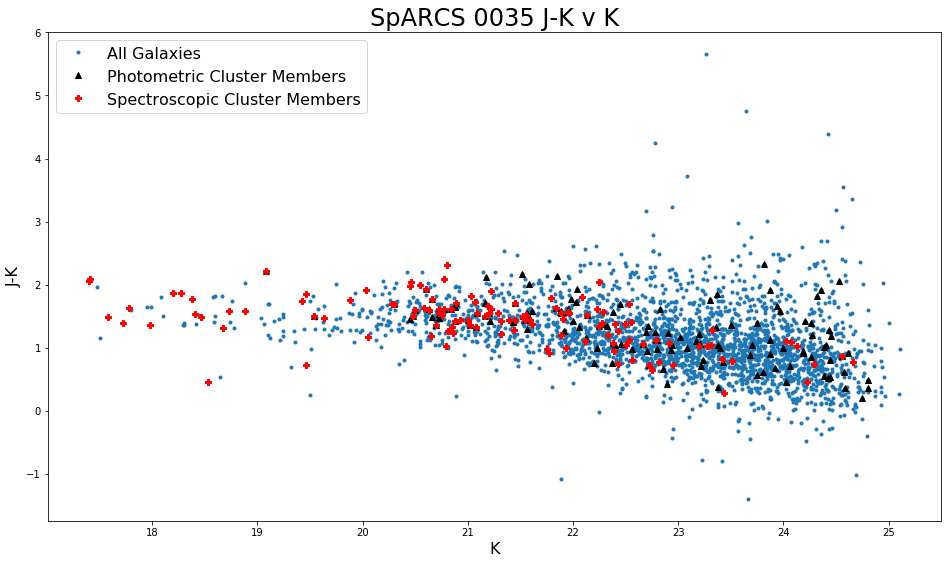

In [35]:
#run SpARCS_0219_color_magnitude_plots.py

title = 'SpARCS 0035'
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodJK], JMINK[goodJK], '.', label="All Galaxies")
plt.plot(KMAG[i_goodJK_member], JMINK[i_goodJK_member], '^', color = 'black', label="Photometric Cluster Members")
plt.plot(KMAG[i_goodJK_member_spec], JMINK[i_goodJK_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
plt.title(title + ' J-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('J-K', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

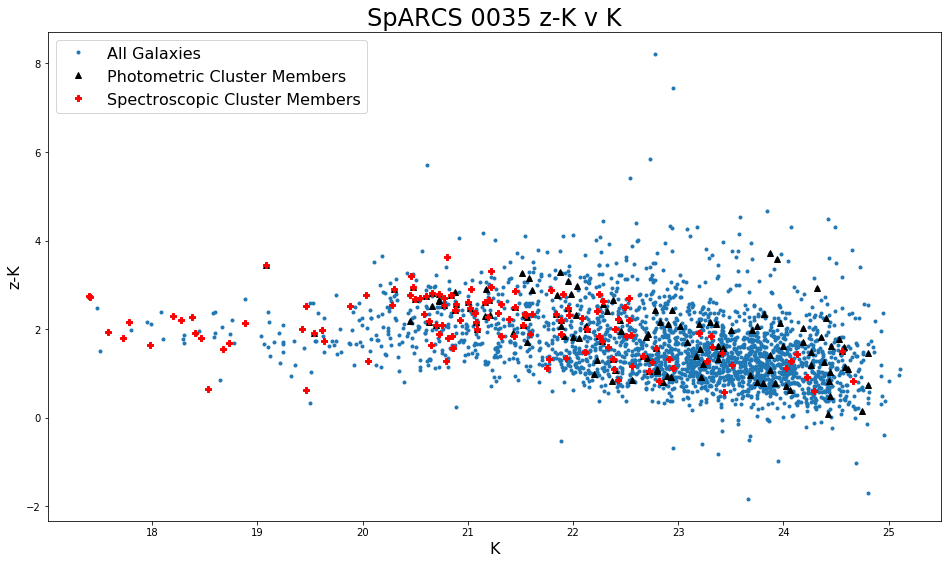

In [30]:
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodzK], zMINK[goodzK], '.', label="All Galaxies")
plt.plot(KMAG[i_goodzK_member], zMINK[i_goodzK_member], '^', color = 'black', label="Photometric Cluster Members")
plt.plot(KMAG[i_goodzK_member_spec], zMINK[i_goodzK_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
plt.title(title + ' z-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('z-K', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

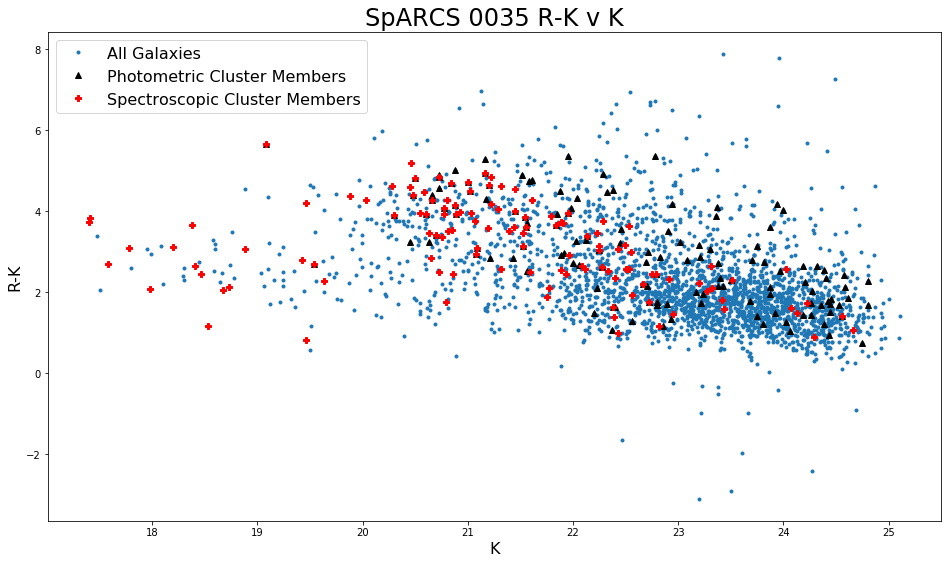

In [31]:
plt.figure(figsize=(16,9))
plt.plot(KMAG[goodRK], RMINK[goodRK], '.', label = "All Galaxies")
plt.plot(KMAG[i_goodRK_member], RMINK[i_goodRK_member], '^', color = 'black', label = "Photometric Cluster Members")
plt.plot(KMAG[i_goodRK_member_spec], RMINK[i_goodRK_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
plt.title(title + ' R-K v K', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('R-K', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

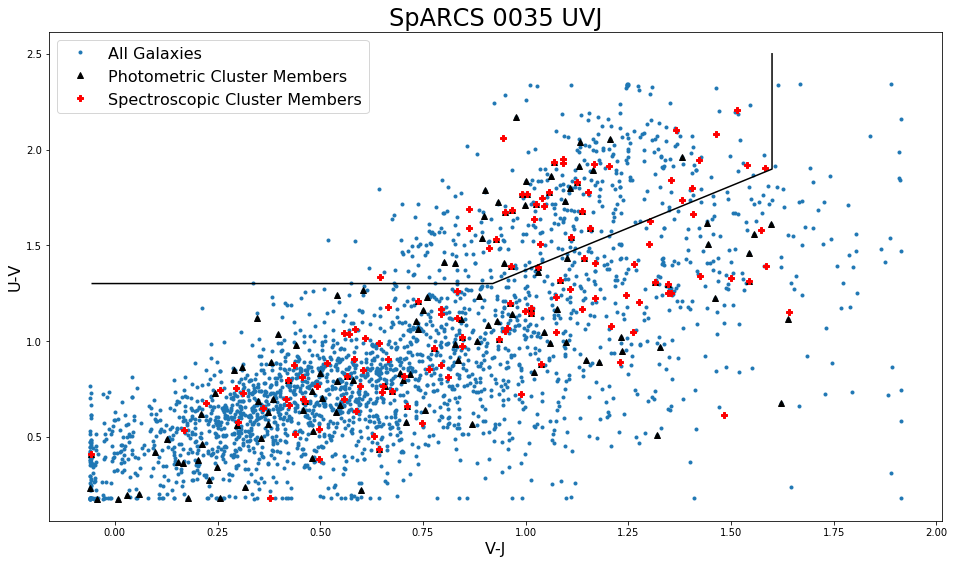

In [32]:
plt.figure(figsize=(16,9))
plt.plot(VMINJ[goodUVJ], UMINV[goodUVJ], '.', label = "All Galaxies")
plt.plot(VMINJ[i_goodUVJ_member], UMINV[i_goodUVJ_member], '^', color = 'black', label = "Photometric Cluster Members")
plt.plot(VMINJ[i_goodUVJ_member_spec], UMINV[i_goodUVJ_member_spec], 'P', color = 'red', label="Spectroscopic Cluster Members")
#The Quiescent cut based on Williams et al.
#U-V>1.3, V-J < 1.6, and (U-V)>0.88x(V-J) + 0.49
plt.plot((-0.055, 0.92, 1.6, 1.6),(1.3, 1.3, 1.898, 2.5), color = 'black')
plt.title(title + ' UVJ', fontsize = 24)
plt.xlabel('V-J', fontsize = 16)
plt.ylabel('U-V', fontsize = 16)
plt.legend(fontsize=16)
plt.show()

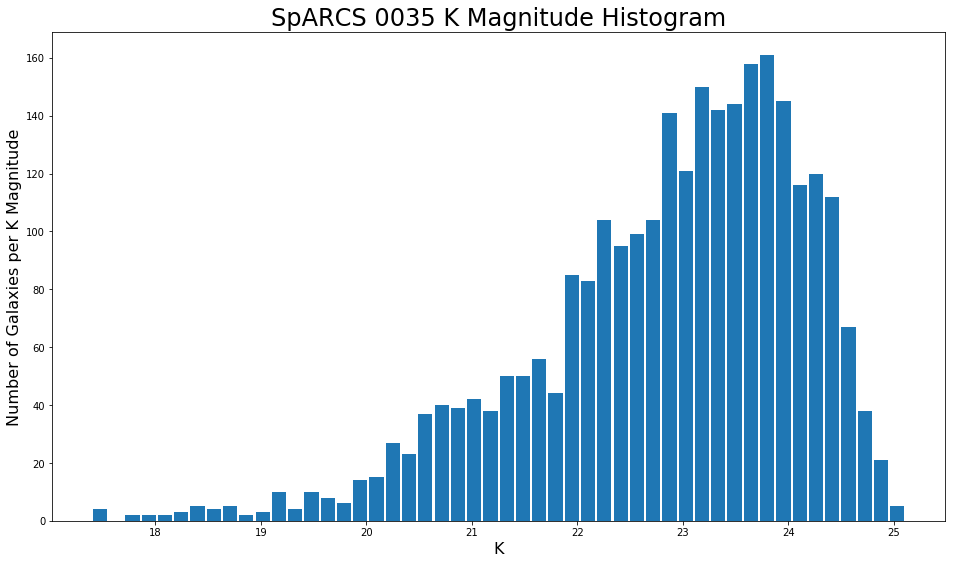

In [33]:
plt.figure(figsize=(16,9))
plt.hist(KMAG[goodUVJ], 50, alpha=1, rwidth=0.875)
plt.title(title + ' K Magnitude Histogram', fontsize = 24)
plt.xlabel('K', fontsize = 16)
plt.ylabel('Number of Galaxies per K Magnitude', fontsize = 16)
plt.show()